### Exploratory Data Analysis

In [1]:
#Import necessary libraries
import pandas as pd
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Import CreditScoringModelEDA module
from EDA import CreditScoringModelEDA
import seaborn as sns
import matplotlib.pyplot as plt



#### Loading the data

In [2]:
data=pd.read_csv("../data/data.csv")
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Import the class CreditScoringModelEDA
from EDA import CreditScoringModelEDA

# Initialize the class
eda = CreditScoringModelEDA(data)


In [4]:
eda.data_overview(data)

Number of rows:95662
Number of columns:16
Data types of each column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [5]:
# Convert the TransactionStartTime to appropriate datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

In [6]:
eda.summarize_statics(data)

,Mean,Median,Mode,Standard Deviation,Variance,Range,IQR,Skewness,Kurtosis
Amount,6717.846433,1000.0,1000.0,123306.797164,1.520457e+10,10880000.0,2850.0,51.098490,3363.127739
Value,9900.583941,1000.0,1000.0,123122.087776,1.515905e+10,9879998.0,4725.0,51.291086,3378.069274
CountryCode,256.000000,256.0,256.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000
PricingStrategy,2.255974,2.0,2.0,0.732924,5.371778e-01,4.0,0.0,1.659057,2.087534
FraudResult,0.002018,0.0,0.0,0.044872,2.013471e-03,1.0,0.0,22.196295,490.685762


#### Interpretation of the data distribution for each column:

#### 1. **Amount & Value**
Both columns exhibit significant skewness and outliers, with most values clustering around lower amounts (median = 1,000), while a few extreme values pull the mean upwards. The high standard deviation and variance indicate substantial variation in the data. These distributions likely require transformation (e.g., log transformation) to normalize before applying most statistical models. The presence of extreme outliers will also necessitate careful handling, particularly in predictive modeling.

#### 2. **CountryCode**
This column is constant, offering no variability or predictive power. It should likely be excluded from any modeling efforts unless this constant value has some inherent significance that’s not immediately obvious.

#### 3. **PricingStrategy**
The 'PricingStrategy' column is centered around a specific value (2.0), showing low variability and a slightly skewed distribution. This is a categorical-like feature, and since its skewness is minimal, it should not present issues for models. Depending on the algorithm, encoding methods such as one-hot or label encoding might be needed.

#### 4. **FraudResult**
'FraudResult' is highly imbalanced, with very few cases of fraud (mean = 0.002). This imbalance could create challenges for classification models. Techniques like resampling (oversampling/undersampling), SMOTE, or using evaluation metrics suited to imbalanced data (e.g., precision, recall, F1-score) will be essential for detecting fraud accurately.

### Overall Recommendations:
- **Outlier Handling**: Both 'Amount' and 'Value' show extreme outliers and skewness and both are similar but **Amount** have more important to data, so drop **Drop Value**. Preprocessing steps, such as scaling and outlier removal, may improve model performance.
- **Class Imbalance**: The 'FraudResult' column is imbalanced, which necessitates specialized techniques to address this during model building.
- **Feature Selection**: 'CountryCode' should be removed or re-evaluated, as it adds no value in its current form.

This data will require substantial preprocessing and feature engineering to ensure robust model performance.

### Identifying Missing Values
**Identifying missing values to determine missing data**

In [7]:
eda.check_missing_value(data)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
There is no missing value in the data


***No missing values were detected in any of the columns, ensuring the dataset is complete and ready for further analysis without the need for imputation.***

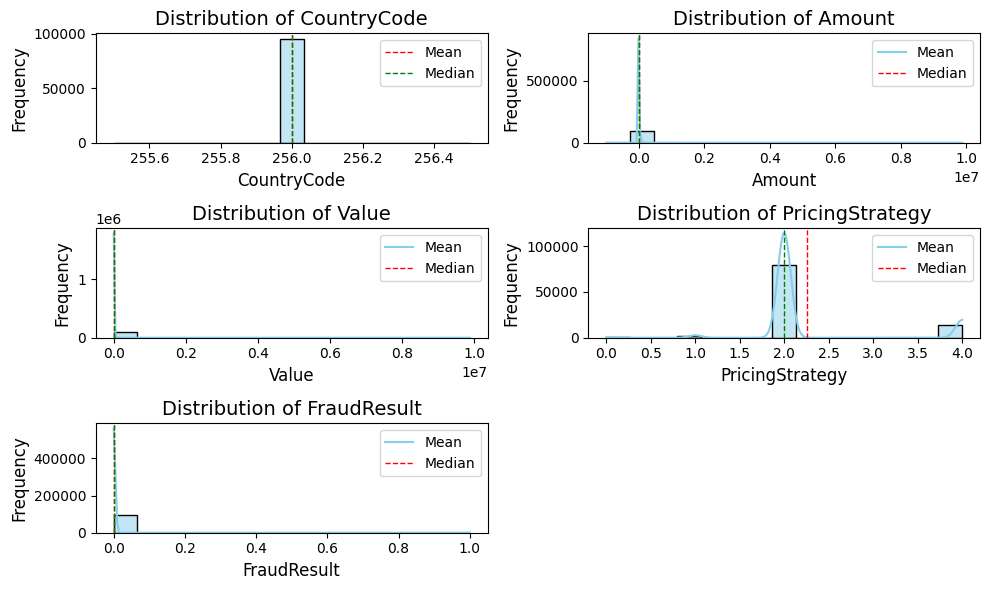

In [8]:
numeric_cols = data.select_dtypes(include='number').columns
eda.plot_numerical_distribution(numeric_cols)

## Visualizations

#### 1. **CountryCode**
- The plot shows no variability in the `CountryCode`, as the entire dataset consists of a single value (256). This confirms the earlier observation that `CountryCode` offers no variability and should likely be excluded from any analysis.

#### 2. **Amount**
- The distribution is highly right-skewed, with most data points clustered near zero, and a long tail extending toward higher values. This indicates the presence of extreme outliers and skewness, suggesting that a log transformation or other techniques may be needed to handle the skewness in predictive models.

#### 3. **Value**
- Similar to `Amount`, this distribution is also highly skewed to the right, with most of the data close to zero. Again, the presence of extreme outliers means preprocessing (e.g., outlier handling, normalization) will be essential.

#### 4. **PricingStrategy**
- The distribution of `PricingStrategy` appears more concentrated around specific values, particularly around 2.0. There is some slight skewness, but the data is relatively concentrated, and the mean and median are close together. This feature likely won’t require major transformations but may need encoding if used in models.

#### 5. **FraudResult**
- The distribution is highly imbalanced, with most values being 0 (non-fraudulent cases) and very few instances of 1 (fraud). This confirms the earlier observation that fraud is a rare event and will require techniques to address class imbalance (e.g., resampling, SMOTE).

#### Overall Recommendations:
- **Outliers and Skewness**: Both `Amount` and `Value` require careful handling of outliers and skewness. Log transformations and other techniques should be explored to improve the data distribution.
- **Class Imbalance**: For `FraudResult`, you need to address the imbalanced nature of the data using techniques suited to rare events.
- **CountryCode**: This feature likely offers no useful information and can be dropped.

These steps will ensure your data is well-prepared for model training and analysis.

# Distribution of Categorical Features

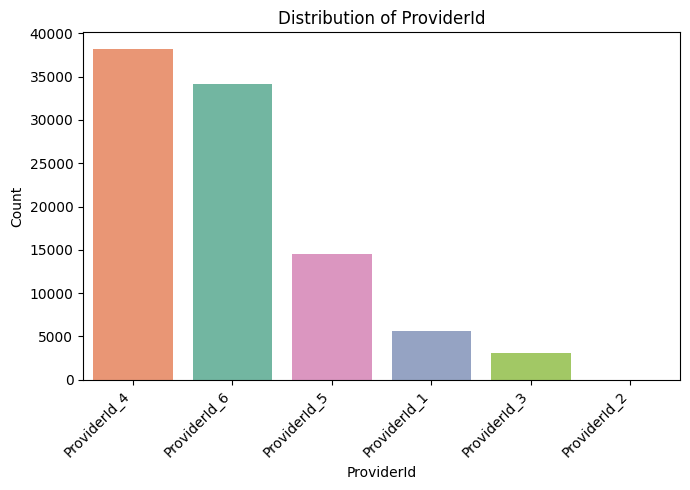

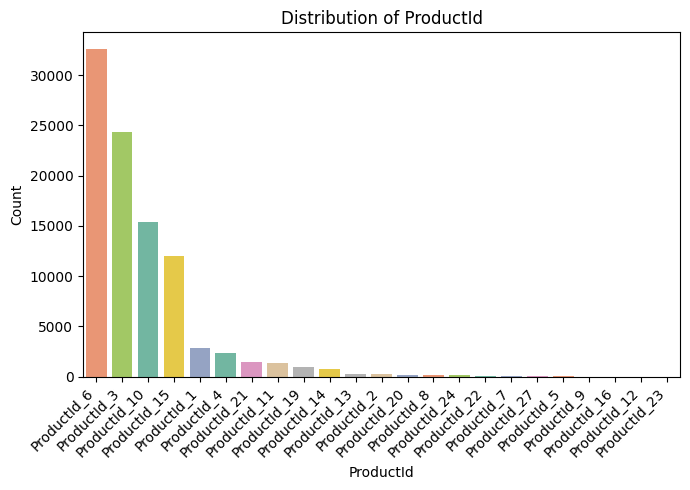

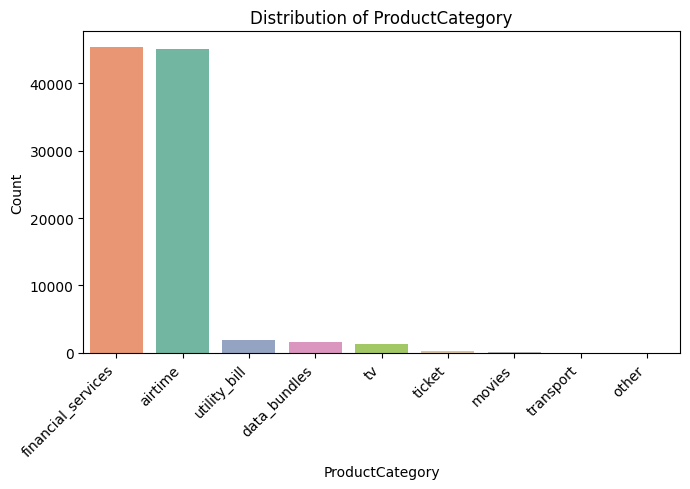

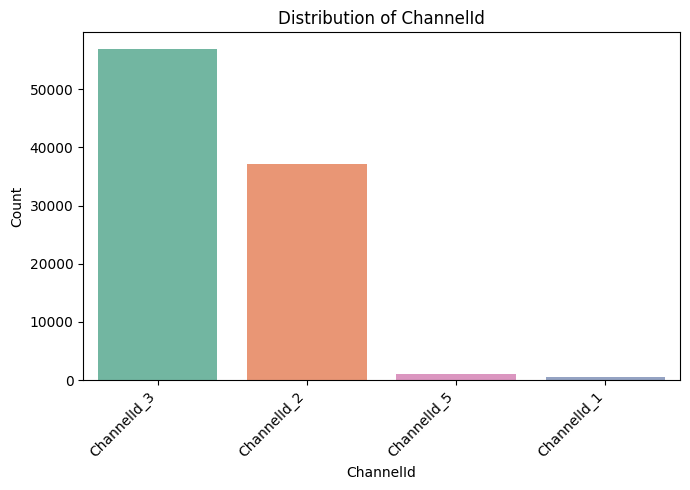

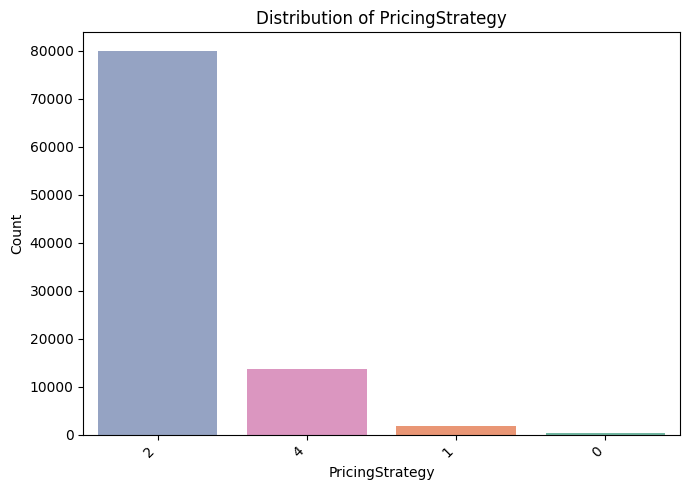

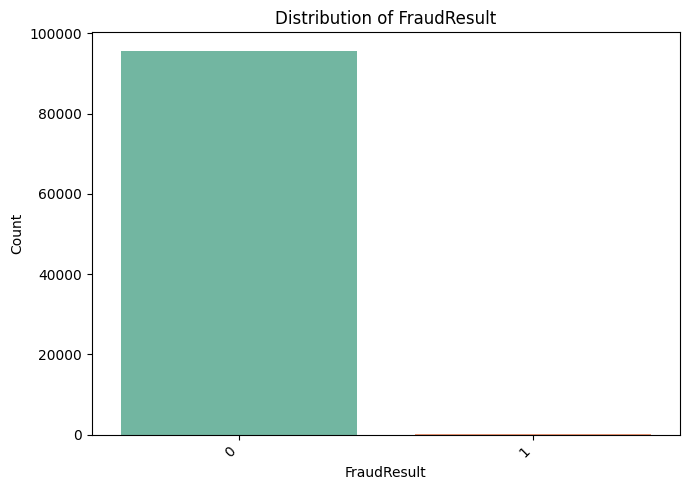

In [9]:
eda.plot_categorical_distributions(data)

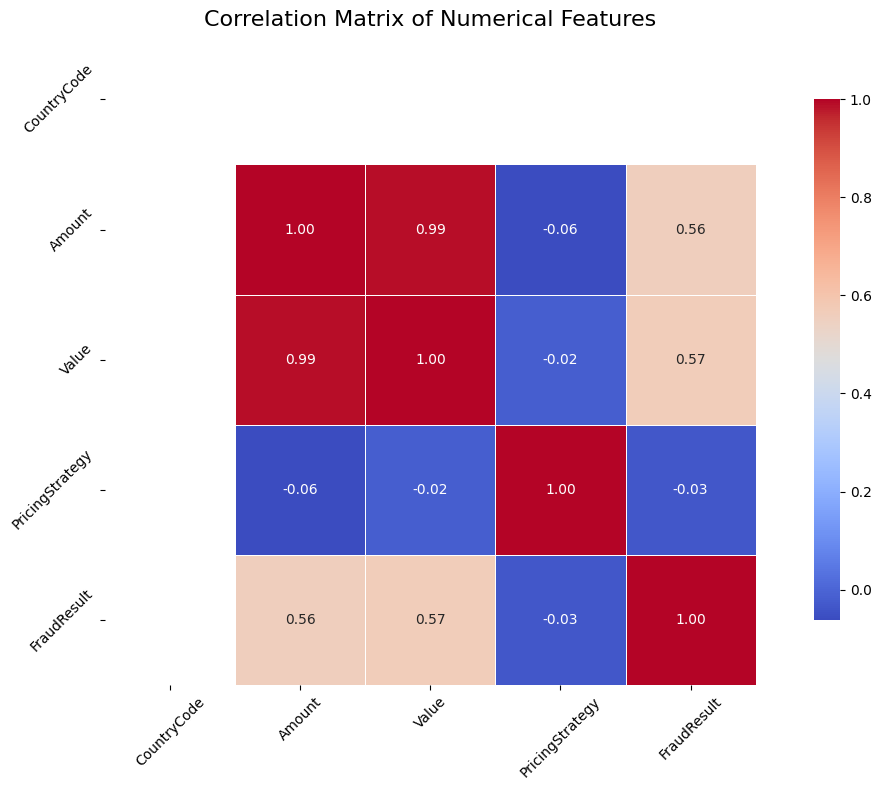

In [10]:

# Select numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

* Amount and Value has strong positive correlation since they provide the same information. Value has no significance for future modeling

* Amount and FraudResults has moderate correlation

## Outlier Detection

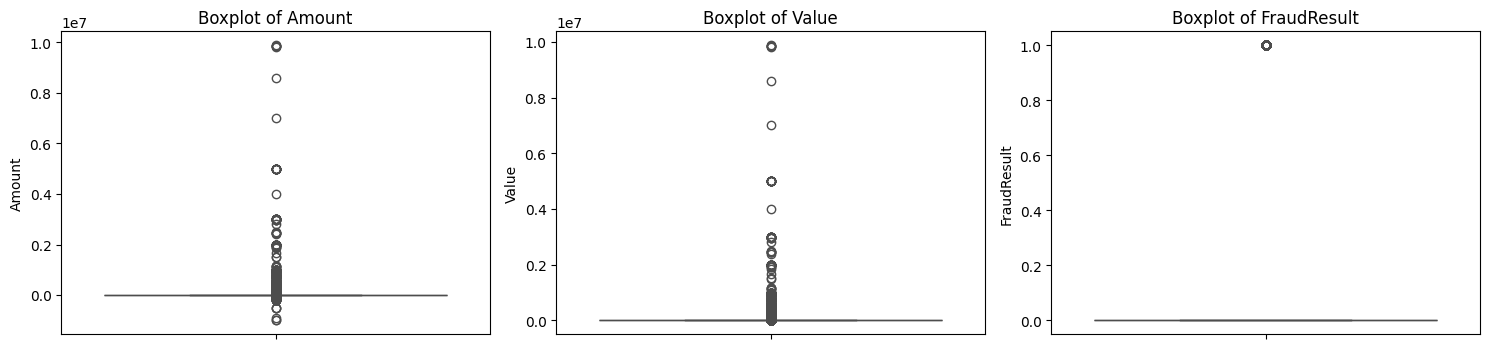

In [12]:
# eda.plot_outliers_boxplots(data)

eda.detect_outliers(['Amount', 'Value', 'FraudResult'])

The box plots illustrate the distribution of numerical features and highlight the presence of outliers:

- **Amount and Value**: Both features display a considerable number of outliers, especially at higher transaction values. These could indicate extreme cases or potential fraud, warranting further examination or the use of scaling techniques during preprocessing.
  
- **FraudResult**: Since this is a binary variable, there are fewer outliers. However, the key observation here is the imbalanced distribution of fraud occurrences, which needs careful handling.

### Feature Engineering.....